In [70]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import datetime
from sklearn.metrics import roc_curve
from sklearn import ensemble

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.externals import joblib
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

import pylab as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

import pickle

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
    #In the cmd line type: conda install python-graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pickle.load(open("df_c.dat", "rb"))

In [3]:
df.tail()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_,No-show_,Delta_Dates,...,72,73,74,75,76,77,78,79,80,81
71954,102,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
71955,115,0,0,0,0,1,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
71956,115,0,0,0,0,1,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
71957,115,0,0,0,0,1,0,0,1,38,...,0,0,0,0,0,0,0,0,0,0
71958,115,0,1,0,0,0,1,0,0,15,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# פיצול לטריין וטסט
train_df, test_df= train_test_split(df, test_size = 0.2, random_state=7)
y = train_df["No-show_"]
X = train_df.drop(['No-show_'], axis = 1)

y_test=test_df["No-show_"]
X_test=test_df.drop(['No-show_'], axis = 1)

# עץ החלטה גדול

In [6]:
tree_clf = DecisionTreeClassifier (max_depth = 9)# class_weight={0:2,1:10})
tree_clf.fit (X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
from sklearn.tree import export_graphviz #In the cmd line type: conda install python-graphviz
import graphviz

dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = ['SMS_received', 'Gender_', 'Delta_Dates', 'Scholarship', 'Hipertension',
       'Diabetes', 'prcp', 'temp', 'Alcoholism', 'Handcap', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Appointment_counts', 'ADOULT', 'KID', 'OLD', 'YOUNG' ],
                           class_names = ["show", "no_show" ],
                           rounded = True, filled=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

ValueError: Length of feature_names, 22 does not match number of features, 15

In [7]:
y_test_predict = tree_clf.predict (X_test)

In [8]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[10118,   295],
       [ 3763,   216]], dtype=int64)

In [9]:
recall_score(y_test, y_test_predict)

0.0542849962302086

In [10]:
precision_score(y_test, y_test_predict)

0.4227005870841487

## Random Forest

In [11]:
rnd_clf = RandomForestClassifier(n_estimators=100,max_depth = 15 ,class_weight={0:2,1:10})
rnd_clf.fit (X, y)
y_pred_rf = rnd_clf.predict(X_test)

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix

array([[ 769, 9644],
       [ 140, 3839]], dtype=int64)

In [13]:
precision_score(y_test, y_pred_rf)

0.28472891789661053

In [14]:
recall_score(y_test, y_pred_rf)

0.9648152802211611

## GBM 

In [15]:
clf_gb = ensemble.GradientBoostingClassifier(n_estimators=50,max_depth = 5)
clf_gb.fit(X, y)
y_pred_gb = clf_gb.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred_gb)

array([[10327,    86],
       [ 3901,    78]], dtype=int64)

In [17]:
precision_score(y_test, y_pred_gb)

0.47560975609756095

In [18]:
recall_score(y_test, y_pred_gb)

0.019602915305353102

# PROBABILITY-עץ גדול

In [19]:
y_test_proba = tree_clf.predict_proba(X_test)
y_test_proba[:,1]
y_test_proba

array([[0.73454276, 0.26545724],
       [0.72069825, 0.27930175],
       [0.75383492, 0.24616508],
       ...,
       [0.82578397, 0.17421603],
       [0.67710843, 0.32289157],
       [0.68117409, 0.31882591]])

In [20]:
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
y_pred_Set_T = binarize(y_test_proba, 0.05)

In [21]:
y_pred_Set_T=y_pred_Set_T[:,1]

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred_Set_T)
conf_matrix

array([[   86, 10327],
       [   30,  3949]], dtype=int64)

In [23]:
recall_score(y_test, y_pred_Set_T)

0.9924604171902488

In [24]:
precision_score(y_test, y_pred_Set_T)

0.2766181003082096

 Precision =  [0.27647304 0.27623111 0.27638578 0.2766181  0.27657039 0.27665544
 0.27671367 0.27670175 0.27661964 0.27697081 0.2775089  0.27822725
 0.27834756 0.27845193 0.28168498 0.28302305 0.28377875 0.28370326
 0.28374553 0.28338567 0.28335204 0.28341204 0.28362354 0.28441549
 0.28445859 0.28853879 0.28913371 0.2892503  0.28966068 0.29198629
 0.29476769 0.29790355 0.29844021 0.29831714 0.29836891 0.29999119
 0.30008818 0.30085909 0.30378251 0.30366395 0.30371193 0.30346553
 0.30344892 0.3034406  0.30343228 0.30816506 0.31103038 0.3124744
 0.31256405 0.31391758 0.31391138 0.31593794 0.31886792 0.31924672
 0.31928322 0.33241866 0.34144247 0.34159622 0.34211284 0.34216208
 0.34171687 0.3413418  0.3414966  0.3433584  0.34378941 0.34340877
 0.34352233 0.34612882 0.34954865 0.34994129 0.35195923 0.35215479
 0.35384941 0.37316441 0.37352178 0.37391842 0.37406948 0.37461011
 0.37895438 0.37965176 0.37992463 0.37928646 0.39146568 0.39520384
 0.39528166 0.39537126 0.39543911 0.39565861 0.39

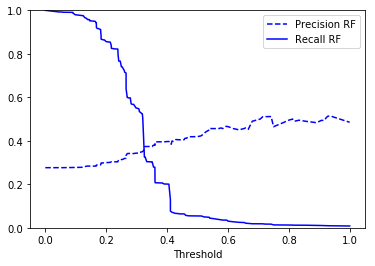

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_true = y_test, probas_pred =y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="RF")
plt.legend(loc = "best")
plt.show()

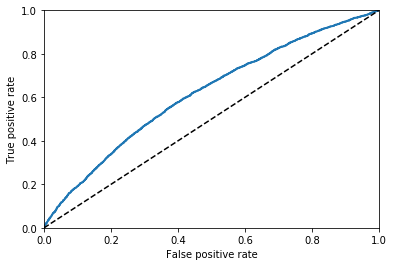

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "tree")
plt.show()

# PROBABILITY-RF

In [73]:
y_test_proba =rnd_clf.predict_proba(X_test)
y_test_proba[:,1]

array([0.58725114, 0.6673819 , 0.65602669, ..., 0.56782975, 0.51863411,
       0.62917164])

In [74]:
from sklearn.preprocessing import binarize
y_pred_Set_T = binarize(y_test_proba, 0.75)

In [75]:
y_pred_Set_T=y_pred_Set_T[:,1]

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred_Set_T)
conf_matrix

array([[10134,   279],
       [ 3716,   263]], dtype=int64)

In [77]:
recall_score(y_test, y_pred_Set_T)

0.0660970092988188

In [78]:
precision_score(y_test, y_pred_Set_T)

0.48523985239852396

 Precision =  [0.2765499  0.27649962 0.27644933 ... 0.66666667 1.         1.        ] 
 Recalls =  [1.00000000e+00 9.99748681e-01 9.99497361e-01 ... 5.02638854e-04
 5.02638854e-04 0.00000000e+00] 
 Thresholds =  [0.29948424 0.29977871 0.30338401 ... 0.8248423  0.82815435 0.82926166]


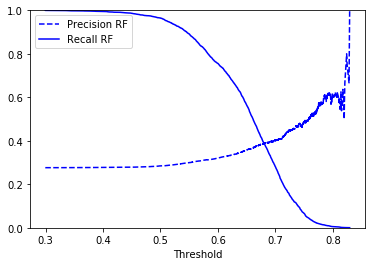

In [79]:
precisions, recalls, thresholds = precision_recall_curve(y_true = y_test, probas_pred =y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="RF")
plt.legend(loc = "best")
plt.show()

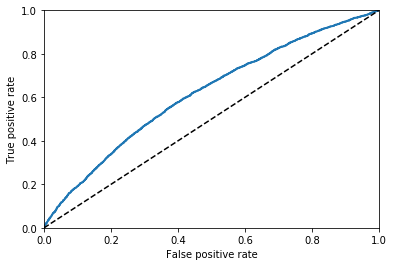

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "tree")
plt.show()

# PROBABILITY-GBM

In [81]:
y_test_proba =clf_gb.predict_proba(X_test)
y_test_proba[:,1]
y_test_proba

array([[0.73882309, 0.26117691],
       [0.70690879, 0.29309121],
       [0.74175701, 0.25824299],
       ...,
       [0.75774251, 0.24225749],
       [0.75907815, 0.24092185],
       [0.71359428, 0.28640572]])

In [89]:
from sklearn.preprocessing import binarize
y_pred_Set_T = binarize(y_test_proba, 0.8)

In [90]:
y_pred_Set_T=y_pred_Set_T[:,1]

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred_Set_T)
conf_matrix

array([[10413,     0],
       [ 3979,     0]], dtype=int64)

In [92]:
recall_score(y_test, y_pred_Set_T)

0.0

In [93]:
precision_score(y_test, y_pred_Set_T)

C:\Users\oripo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

 Precision =  [0.27653068 0.2764804  0.27651884 ... 0.         0.         1.        ] 
 Recalls =  [1.         0.99974868 0.99974868 ... 0.         0.         0.        ] 
 Thresholds =  [0.09723658 0.09814611 0.09922344 ... 0.70331372 0.70975823 0.71435253]


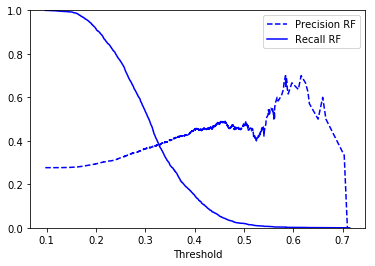

In [94]:
precisions, recalls, thresholds = precision_recall_curve(y_true = y_test, probas_pred =y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="RF")
plt.legend(loc = "best")
plt.show()

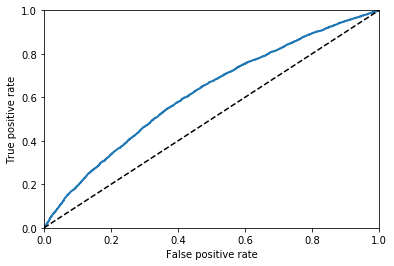

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "tree")
plt.show()